In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


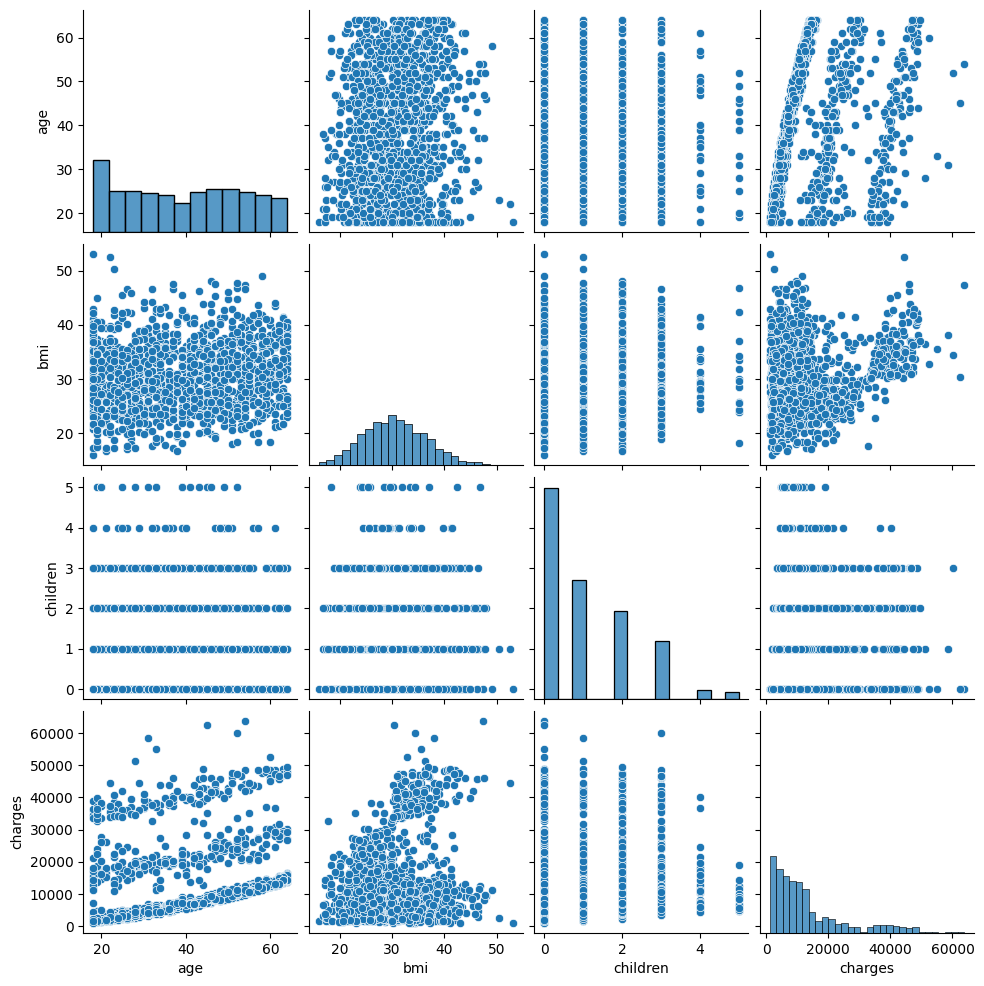

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.shape

(1338, 7)

In [9]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

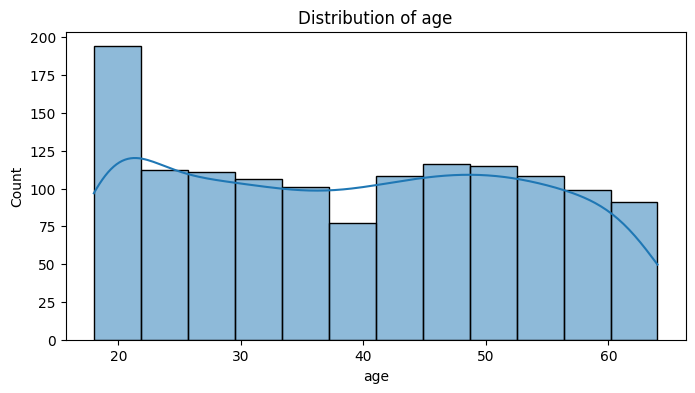

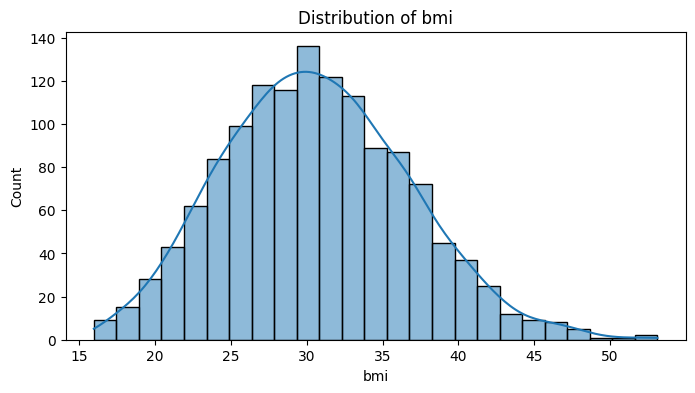

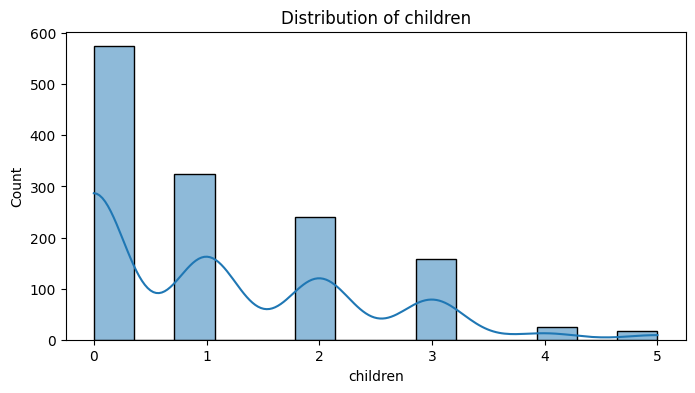

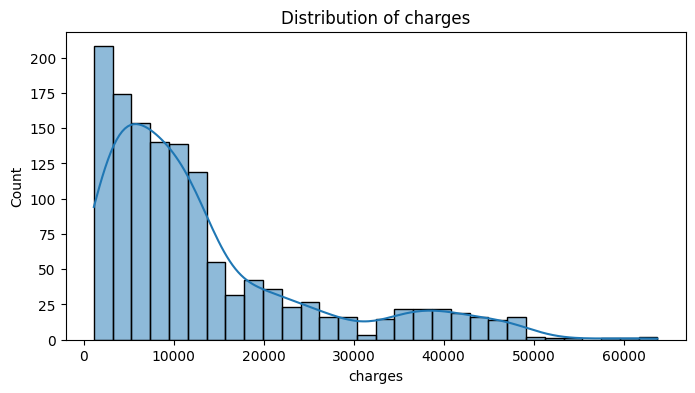

In [12]:
numeric_columns=['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    # pass the DataFrame as `data` and the column name as `x` to satisfy type checkers
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()  

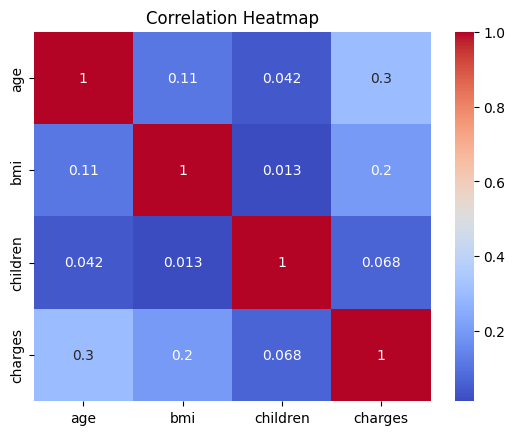

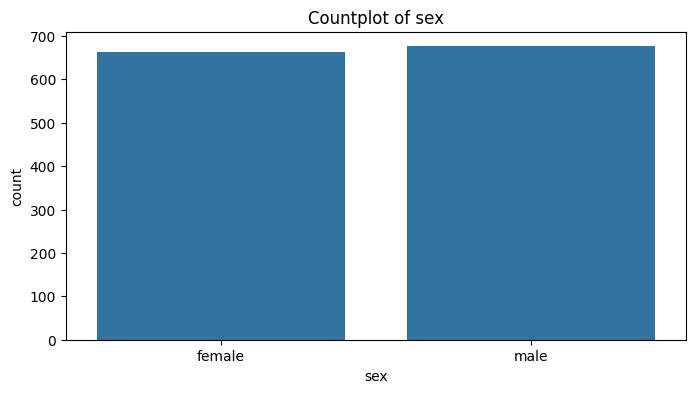

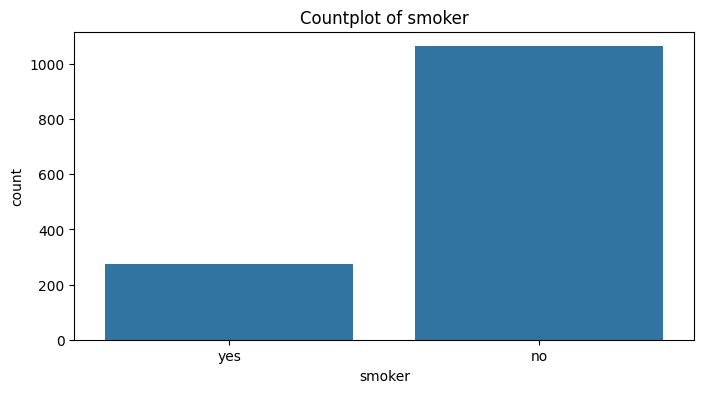

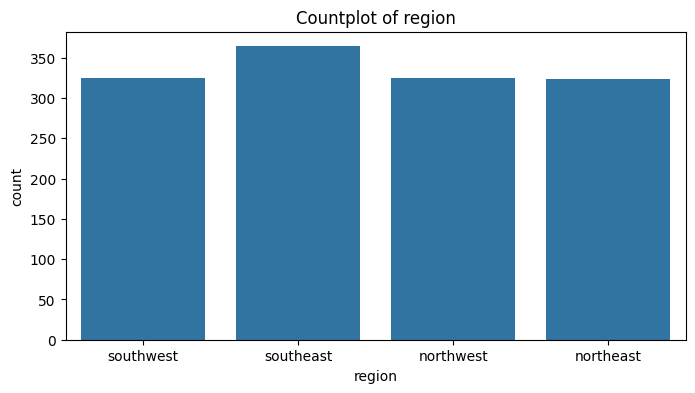

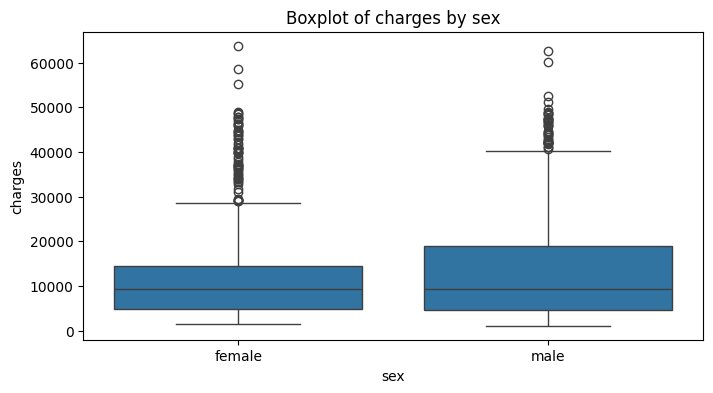

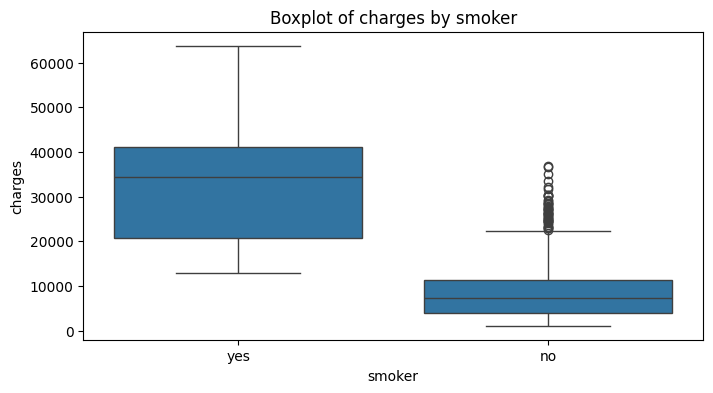

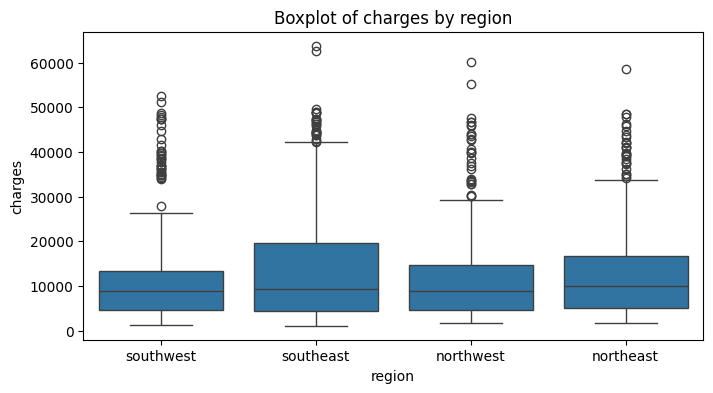

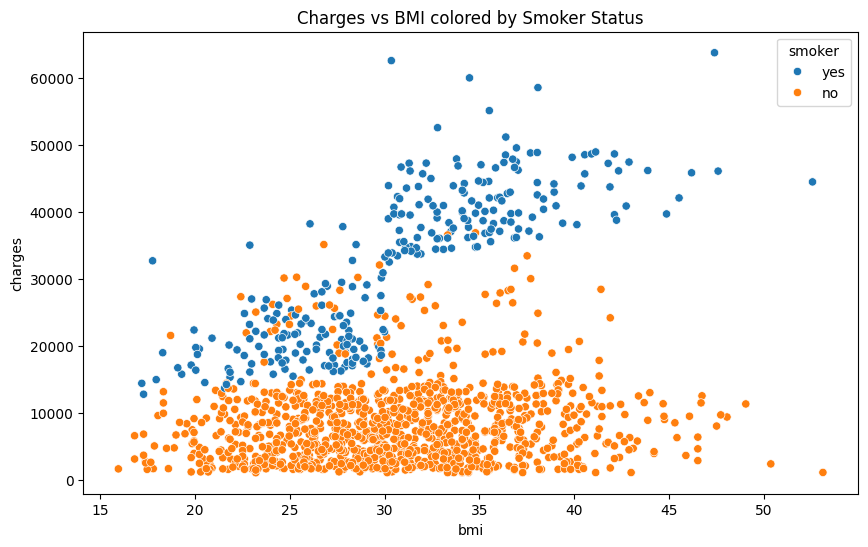

In [14]:
# compute correlations only on numeric columns to avoid conversion errors from string columns
numeric_df = df.select_dtypes(include=[np.number])
heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

categorical_columns = ['sex', 'smoker', 'region']
# use a different loop variable name to avoid clobbering any existing variable named `col`
for cat in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=cat)
    plt.title(f'Countplot of {cat}')
    plt.show()

for cat in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=cat, y='charges')
    plt.title(f'Boxplot of charges by {cat}')
    plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Charges vs BMI colored by Smoker Status')
plt.show()

In [17]:
df_cleaned = df.copy()

In [18]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df_cleaned.shape


(1338, 7)

In [20]:
df_cleaned.drop_duplicates(inplace=True)

In [21]:
df_cleaned.shape

(1337, 7)

In [22]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [24]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [25]:
df_cleaned['sex']=df_cleaned['sex'].map({'male':0,'female':1})

In [26]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [27]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [29]:
df_cleaned['smokker']=df_cleaned['smoker'].map({'yes':1,'no':0})

In [30]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges,smokker
0,19,1,27.900,0,yes,southwest,16884.92400,1
1,18,0,33.770,1,no,southeast,1725.55230,0
2,28,0,33.000,3,no,southeast,4449.46200,0
3,33,0,22.705,0,no,northwest,21984.47061,0
4,32,0,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830,0
1334,18,1,31.920,0,no,northeast,2205.98080,0
1335,18,1,36.850,0,no,southeast,1629.83350,0
1336,21,1,25.800,0,no,southwest,2007.94500,0


In [31]:
df_cleaned.rename(columns={'sex':'is_sex', 'smokker':'is_smoker'}, inplace=True)

In [32]:
df_cleaned

,age,is_sex,bmi,children,smoker,region,charges,is_smoker
0,19,1,27.900,0,yes,southwest,16884.92400,1
1,18,0,33.770,1,no,southeast,1725.55230,0
2,28,0,33.000,3,no,southeast,4449.46200,0
3,33,0,22.705,0,no,northwest,21984.47061,0
4,32,0,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830,0
1334,18,1,31.920,0,no,northeast,2205.98080,0
1335,18,1,36.850,0,no,southeast,1629.83350,0
1336,21,1,25.800,0,no,southwest,2007.94500,0
